**Garson Bahşişleri** 
- Bir restoranda yemek servisi yapan garson, garsonlara verilen bahşişlerle ilgili verileri kaydetmiştir. Restoran tarafından kaydedilen veriler şunlardır:

* total_bill: Vergiler dahil toplam hesap miktarı
* tip: Garsonlara verilen bahşiş miktarı
* sex: Hesabı ödeyen kişinin cinsiyeti
* smoker: Kişinin sigara içip içmediği
* day: Haftanın günü
* time: Öğle veya akşam
* size: Masadaki kişi sayısı
* Bu veriler doğrultusunda amacım, garson bahşişlerini etkileyen faktörleri bulmak ve garson bahşişlerini tahmin etmek için bir makine öğrenme modeli eğitmektir.

In [2]:
import numpy as np
import pandas as pd

Veri setini yükleme

In [3]:
data= pd.read_csv('tips.csv')

İlk 5 satırı görüntüleme

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Temel istatistiklerini görüntüleme

In [38]:
data.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Eksik verilerin sayısı

In [39]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [40]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [46]:
df_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)


Kategorik verileri sayısal verilere dönüştürme

In [47]:
df_encoded

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


* Veri Görselleştirme

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

Bahşişlerin dağılımı

Text(0.5, 0, 'Frekans')

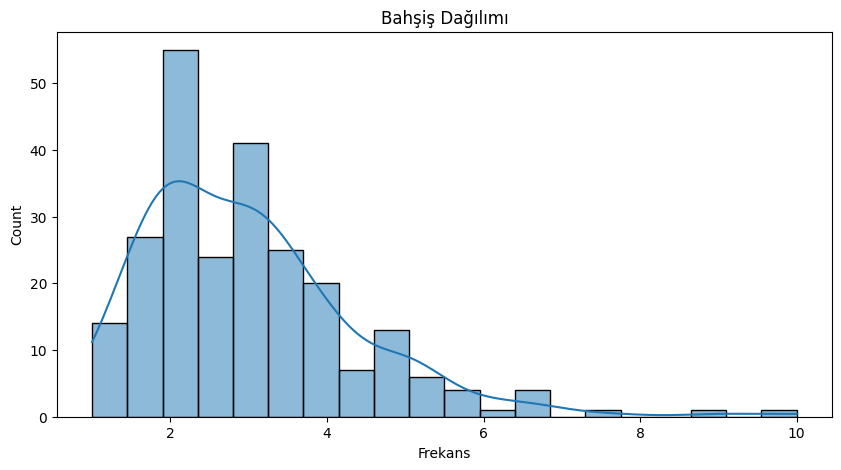

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(df_encoded['tip'],bins=20,kde=True)
plt.title("Bahşiş Dağılımı")
plt.xlabel("Bahşiş")
plt.xlabel("Frekans")

Toplam hesap ve bahşiş arasındaki ilişki

Text(0, 0.5, 'Bahşiş')

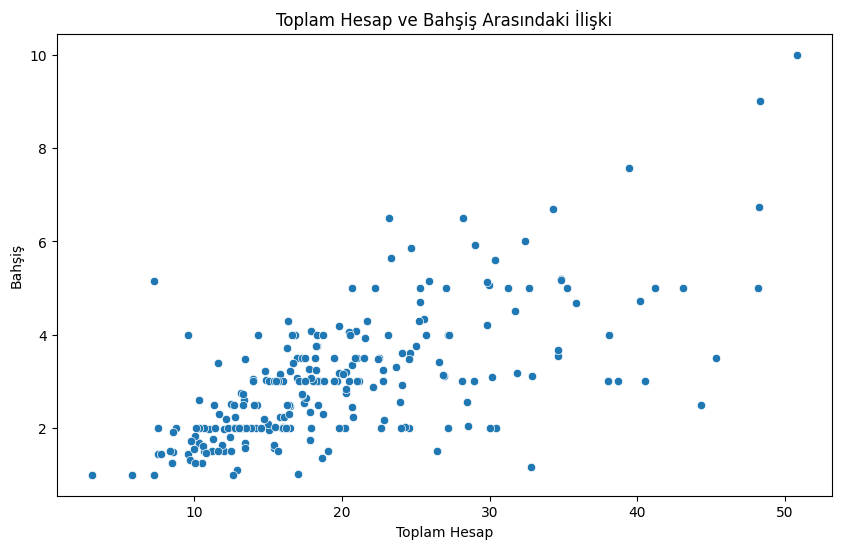

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_encoded['total_bill'], y=df_encoded['tip'])
plt.title('Toplam Hesap ve Bahşiş Arasındaki İlişki')
plt.xlabel('Toplam Hesap')
plt.ylabel('Bahşiş')

Cinsiyetin bahşiş üzerindeki etkisi

Text(0, 0.5, 'Bahşiş')

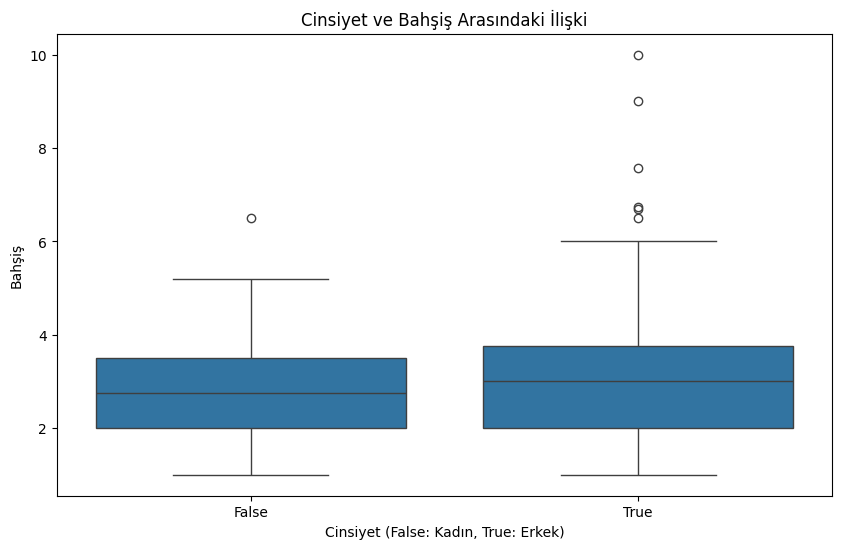

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex_Male', y='tip', data=df_encoded)
plt.title('Cinsiyet ve Bahşiş Arasındaki İlişki')
plt.xlabel('Cinsiyet (False: Kadın, True: Erkek)')
plt.ylabel('Bahşiş')

Sigara içme durumunun bahşiş üzerindeki etkisi

Text(0, 0.5, 'Bahşiş')

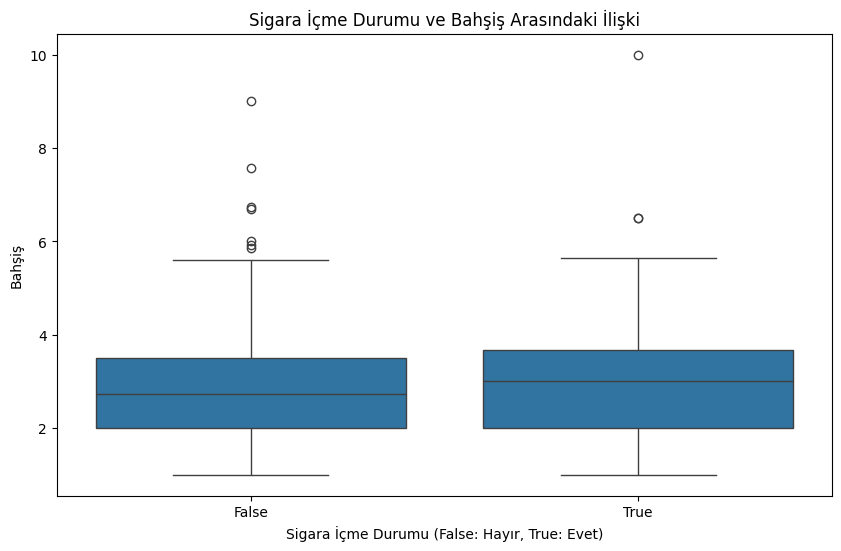

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker_Yes', y='tip', data=df_encoded)
plt.title('Sigara İçme Durumu ve Bahşiş Arasındaki İlişki')
plt.xlabel('Sigara İçme Durumu (False: Hayır, True: Evet)')
plt.ylabel('Bahşiş')

Günün bahşiş üzerindeki etkisi

Text(0, 0.5, 'Bahşiş')

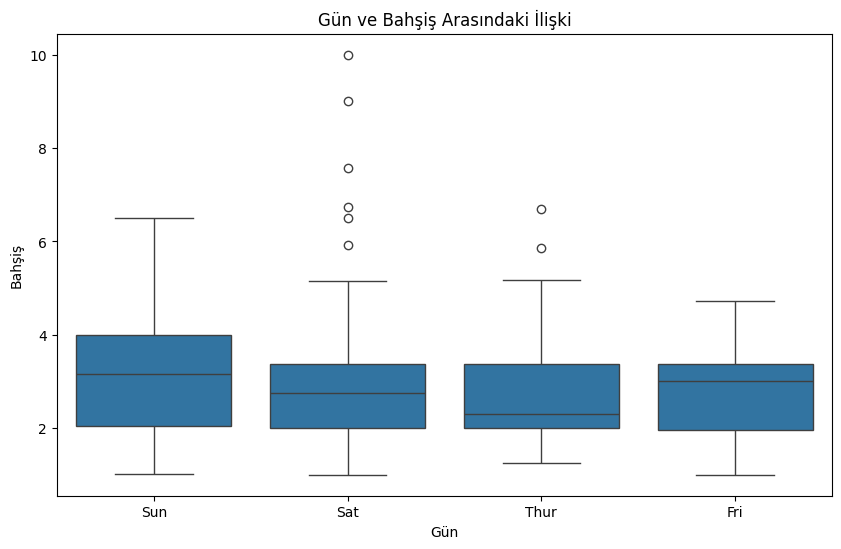

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='tip', data=data)
plt.title('Gün ve Bahşiş Arasındaki İlişki')
plt.xlabel('Gün')
plt.ylabel('Bahşiş')

Kişi sayısının bahşiş üzerindeki etkisi

Text(0, 0.5, 'Bahşiş Miktarı')

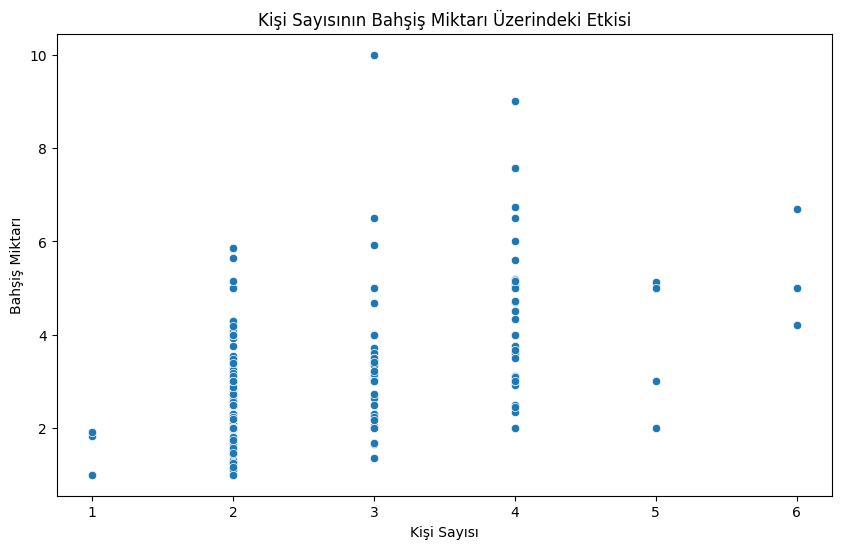

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='tip', data=data)
plt.title('Kişi Sayısının Bahşiş Miktarı Üzerindeki Etkisi')
plt.xlabel('Kişi Sayısı')
plt.ylabel('Bahşiş Miktarı')

Text(0, 0.5, 'Toplam Bahşiş')

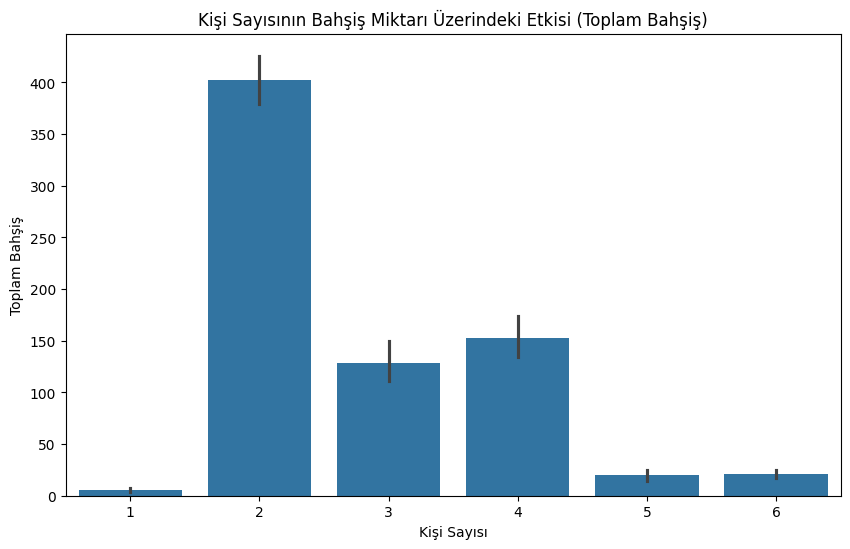

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='tip', data=data, estimator=sum)
plt.title('Kişi Sayısının Bahşiş Miktarı Üzerindeki Etkisi (Toplam Bahşiş)')
plt.xlabel('Kişi Sayısı')
plt.ylabel('Toplam Bahşiş')


Öğün zamanının bahşişler üzerindeki etkisi

Text(0, 0.5, 'Bahşiş Miktarı')

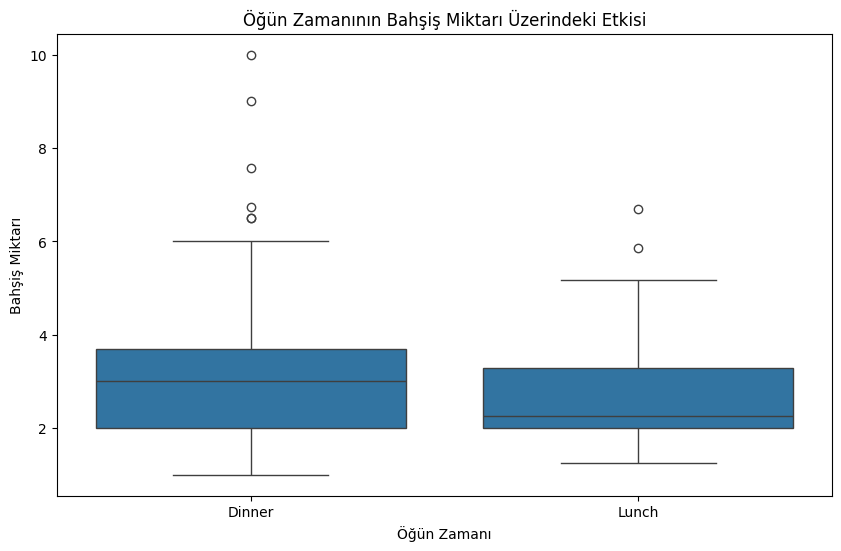

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time', y='tip', data=data)
plt.title('Öğün Zamanının Bahşiş Miktarı Üzerindeki Etkisi')
plt.xlabel('Öğün Zamanı')
plt.ylabel('Bahşiş Miktarı')

Text(0, 0.5, 'Toplam Bahşiş')

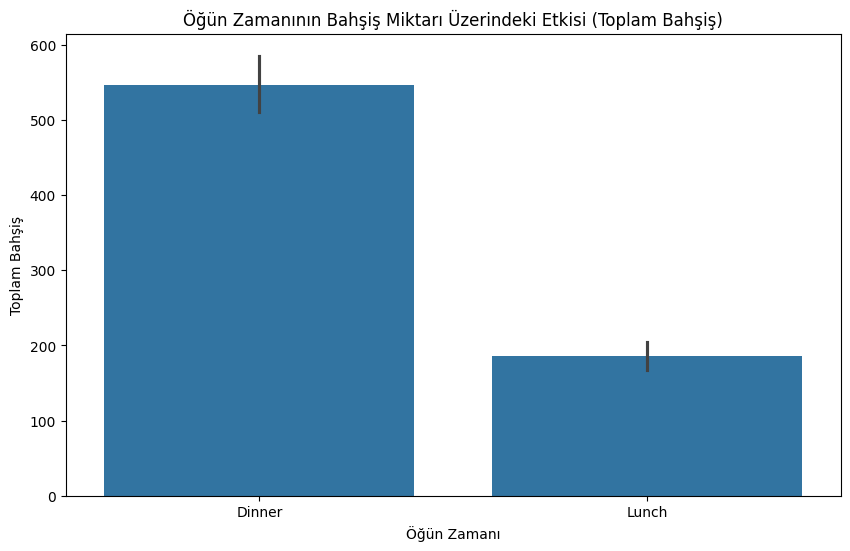

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='tip', data=data, estimator=sum)
plt.title('Öğün Zamanının Bahşiş Miktarı Üzerindeki Etkisi (Toplam Bahşiş)')
plt.xlabel('Öğün Zamanı')
plt.ylabel('Toplam Bahşiş')